# Exploratory Data Analysis in Python
Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. 

Using data to answer questions

What is the average birth weight of babies in the United States?
    Find appropriate data, or collect it
    Read data in your development environment
    Clean and validate

In [5]:
import pandas as pd
nsfg = pd.read_hdf('datasets/nsfg.hdf5', 'nsfg')# NSFG National Survey of Family Growth data 
type(nsfg)

pandas.core.frame.DataFrame

In [6]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [7]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [8]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [9]:
# Each column is a Series
pounds = nsfg['birthwgt_lb1']
type(pounds)

pandas.core.series.Series

In [10]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

In [11]:
#' Selecting columns
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

In [25]:
# Print the first 5 elements of ounces
print(ounces[:5])

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [27]:
pounds.value_counts().sort_index()
# Getting weight of babies

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
Name: birthwgt_lb1, dtype: int64

In [13]:
# Describe
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [15]:
# Replace
import numpy as np
pounds = pounds.replace([98, 99], np.nan)
pounds.mean()

6.703286384976526

In [16]:
ounces.replace([98, 99], np.nan, inplace=True)

In [17]:
# Arithmetic with Series
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [ ]:
# Filter and Visualize

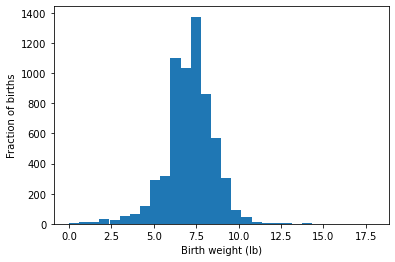

In [18]:
# Histogram
import matplotlib.pyplot as plt

plt.hist(birth_weight.dropna(), bins=30) # removing nulls and defining bins

plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

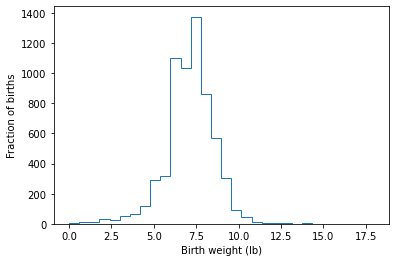

In [32]:
plt.hist(birth_weight.dropna(), bins=30, histtype='step') #unfilled histogram

plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

In [19]:
# Boolean Series
preterm = nsfg['prglngth'] < 37 # result will be boolean series
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [20]:
# Boolean Series
preterm.sum() # treat true as 1 and false as null

3742

In [21]:
preterm.mean()  # give fraction of true 39%

0.39987176747168196

In [22]:
# Filtering
preterm_weight = birth_weight[preterm]  # fitler data
preterm_weight.mean()

5.577598314606742

In [23]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

In [ ]:
# Filtering
# Other logical operators:
# & for AND (both must be true)
# | for OR (either or both can be true)
# # Example:
# birth_weight[A & B] # both true
# birth_weight[A | B] # either or both true

In [ ]:
# Resampling
# NSFG is not representative
# Some groups are "oversampled"
# We can correct using resample_rows_weighted() # need to do statistics course to understand this resampling topic

In [28]:
nsfg['outcome'].value_counts()
# 1	Live birth
# 2	Induced abortion
# 3	Stillbirth
# 4	Miscarriage
# 5	Ectopic pregnancy
# 6	Current pregnancy

# How many pregnancies in this dataset ended with a live birth? Answer is 6489

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

In [30]:
# Print the values and their frequencies
#the number of babies born alive at the end of a pregnancy.
print(nsfg['nbrnaliv'].value_counts())

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.NaN, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64
1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [31]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


In [33]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


## PMF ( Probability mass functions)

In [ ]:
# Datasets
# GSS
# Annual sample of U.S. population.
# Asks about demographics, social and political beliefs.
# Widely used by policy makers and researchers.

In [34]:
# Read the data
gss = pd.read_hdf('datasets/gss.hdf5','gss')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


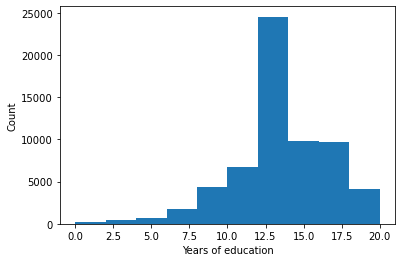

In [37]:
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')
plt.xlabel('Years of education')
plt.ylabel('Count')
plt.show()

In [39]:
!pip install empiricaldist

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11972 sha256=fcca1ccf4796a6dffb73864522977ca71157d02618651ab2d17658a1dc1be00c
  Stored in directory: c:\users\gaura\appdata\local\pip\cache\wheels\1a\33\5a\05bbe93cd4709e7a777f8379efb54114a8f7f6dcb3787805fb
Successfully built empiricaldist

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
#empiricaldist provides Pmf, which is a Pandas Series that represents a probability mass function.
from empiricaldist import Pmf
# PMF
pmf_educ = Pmf(educ)
#pmf_educ = Pmf(educ, normalize=False)
pmf_educ.head()

,probs
0,18.0
1,12.0
2,12.0


# Note CDF and PDF function graph is not working properly in this notebook for empricaldist package.
from empiricaldist import Cdf,pdf
All Cdf and Pdf graph are incorrect!!!

In [53]:
pmf_educ[12]

11.0

In [55]:
#pmf_educ = Pmf(educ, normalize=True)
pmf_educ = Pmf(educ)
pmf_educ.head()

,probs
0,18.0
1,12.0
2,12.0


In [56]:
pmf_educ[12]

11.0

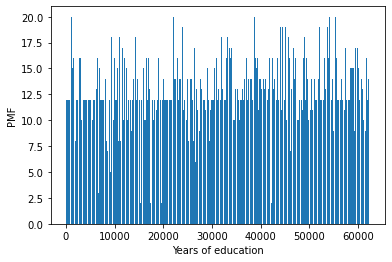

In [57]:
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.show()

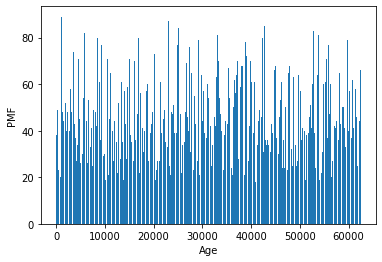

In [48]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

## Cumulative distribution functions
From PMF to CDF
    If you draw a random element from a distribution:
        PMF (Probability Mass Function) is the probability that you
        get exactly x
        CDF (Cumulative Distribution Function) is the probability that
        you get a value <= x
     for a given value of x.

    Example
    PMF of {1, 2, 2, 3, 5}
    PMF(1) = 1/5
    PMF(2) = 2/5
    PMF(3) = 1/5
    PMF(5) = 1/5
    CDF is the cumulative sum of
    the PMF.
    CDF(1) = 1/5
    CDF(2) = 3/5
    CDF(3) = 4/5
    CDF(5) = 1

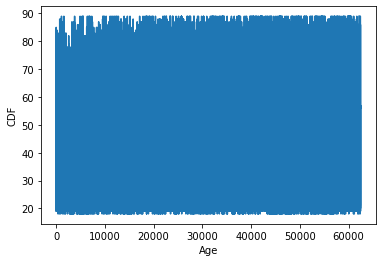

In [59]:
#empiricaldist provides Cdf, which is a Pandas Series that represents a Cumulative distribution function.
from empiricaldist import Cdf
cdf = Cdf(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

In [60]:
# Evaluating the CDF
q = 51
p = cdf(q)
print(p)

53.0


In [61]:
# Evaluating the inverse CDF
p = 0.25
q = cdf.inverse(p)
print(q)

0.0


In [62]:
p = 0.75
q = cdf.inverse(p)
print(q)

0.0


In [63]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

27.0


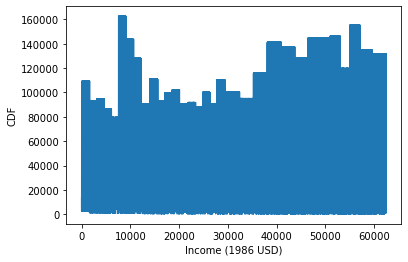

In [64]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

## Comparing distribution

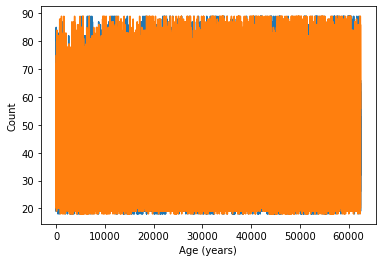

In [66]:
# Multiple PMFs
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]

Pmf(male_age).plot(label='Male')
Pmf(female_age).plot(label='Female')

plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

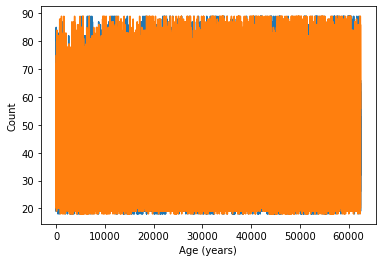

In [67]:
# Multiple CDFs
Cdf(male_age).plot(label='Male')
Cdf(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

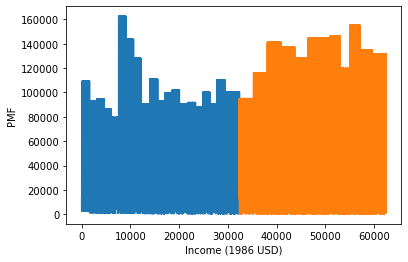

In [68]:
# Income distribution
income = gss['realinc']
pre95 = gss['year'] < 1995
Pmf(income[pre95]).plot(label='Before 1995')
Pmf(income[~pre95]).plot(label='After 1995')
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.show()

<AxesSubplot:>

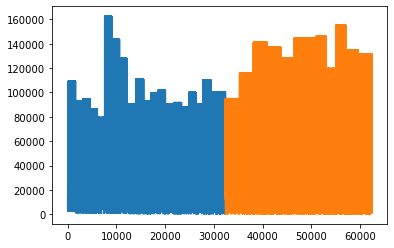

In [69]:
# Income CDFs
Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')

In [71]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

0.5308807991547402


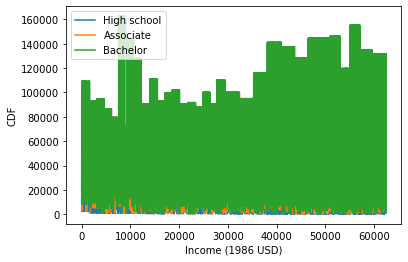

In [72]:
income = gss['realinc']

# Plot the CDFs
Cdf(income[high]).plot(label='High school')
Cdf(income[assc]).plot(label='Associate')
Cdf(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

## Modeling distributions

<AxesSubplot:>

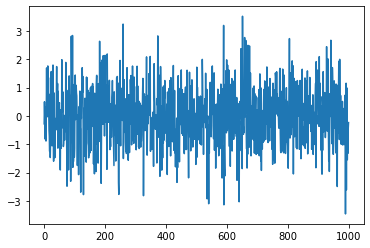

In [81]:
# The normal distribution
from empiricaldist import Cdf
sample = np.random.normal(size=1000)
Cdf(sample).plot()

<AxesSubplot:>

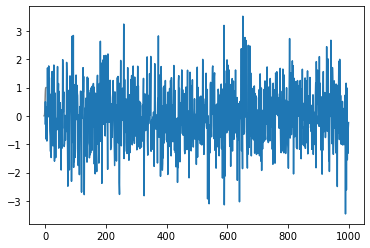

In [82]:
# The normal CDF
from scipy.stats import norm
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)
plt.plot(xs, ys, color='gray')
Cdf(sample).plot()

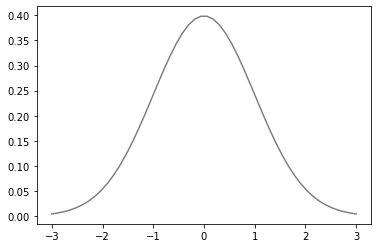

In [83]:
# The bell curve
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray')

<AxesSubplot:ylabel='Density'>

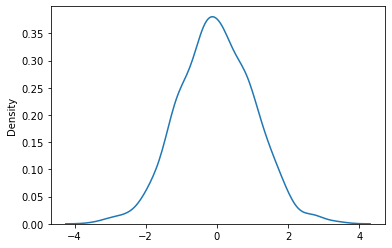

In [84]:
# KDE plot
import seaborn as sns
sns.kdeplot(sample)

<AxesSubplot:ylabel='Density'>

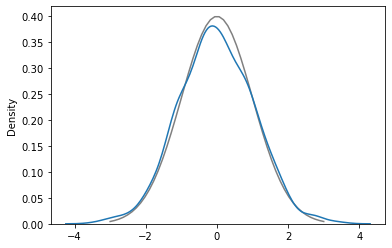

In [85]:
# KDE and PDF
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')
sns.kdeplot(sample)

In [ ]:
# PMF, CDF, KDE
# Use CDFs for exploration.
# Use PMFs if there are a small number of unique values.
# Use KDE if there are a lot of values.

In [86]:
# use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm()

4.371148677933652 0.4290082383271419


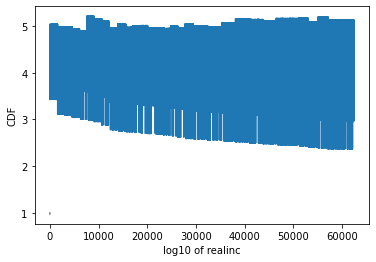

In [87]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

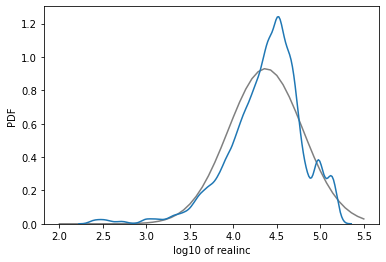

In [90]:
from scipy.stats import norm
dist = norm(mean, std)

# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()